<a href="https://colab.research.google.com/github/Srishti-Mondal/Ontology-and-XAI--heart-disease-prediction/blob/main/Ontology_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Detection using OntoXAI

## Mount Drive

In [ ]:
# Mount Drive to access dataset
from google.colab import drive

drive.mount('/content/drive')
# drive.mount('/content/drive', force_remount=True) # To refresh the mount

Mounted at /content/drive


## Setup: Library and Dataset

In [ ]:
!pip install catboost
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ca25b29475d2af21bf5d6e1cf62d4c354e72b0696d0d184a378791ba856eb6c0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Imports
import zipfile
import os
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from lime.lime_tabular import LimeTabularExplainer

print("Libraries imported successfully!")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Aquila path
ds1_path = '/content/drive/MyDrive/Colab/OntoXAI/1-heart-disease-dataset.zip'
ds2_path = '/content/drive/MyDrive/Colab/OntoXAI/2-heart-disease.zip'

In [ ]:
# Srishti path
ds1_path='/content/drive/MyDrive/Colab Notebooks/OntoXAI/1-heart-disease-dataset.zip'
ds2_path='/content/drive/MyDrive/Colab Notebooks/OntoXAI/2-heart-disease.zip'

In [ ]:
# Sherry path
ds1_path='/content/drive/MyDrive/ontology_research/OntoXAI/1-heart-disease-dataset.zip'
ds2_path='/content/drive/MyDrive/ontology_research/OntoXAI/2-heart-disease.zip'

In [ ]:
# Unzip and Read CSV
with zipfile.ZipFile(ds1_path, 'r') as z:
  with z.open('heart_statlog_cleveland_hungary_final.csv') as f:
    df1 = pd.read_csv(f)

with zipfile.ZipFile(ds2_path, 'r') as z:
  with z.open('heart.csv') as f:
    df2 = pd.read_csv(f)

## Data Handling

Dataframe:  
*df1* and *df2* have exact same columns. Proceeding with df1 (heart-disease-dataset) since it has more records and some preprocessing is already done.

### Strings / Missing Values

In [ ]:
# Check for null values in df1
null_counts = df1.isnull().sum()
print(f"No. of Null Values in each column:\n{null_counts}\n")

# Data types of each column in df1
print(f"Data types of each column:\n{df1.dtypes}")

No. of Null Values in each column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Data types of each column:
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


There are NO **Null Values**, so no imputation required.  
**Strings** have already been encoded, so no handling required.

### Checking for Imbalance

In [ ]:
# Count of each class
class_distribution = df1["target"].value_counts()
print(class_distribution)

# %age
class_percentage = df1["target"].value_counts(normalize=True) * 100
print(class_percentage)

target
1    629
0    561
Name: count, dtype: int64
target
1    52.857143
0    47.142857
Name: proportion, dtype: float64


Both classes are proportionate in terms of samples. So, dataset is **balanced** and no further techniques required.

### Splitting Datastet

Splitting before normalization to avoid data leakage from test set into train process.

In [ ]:
# Split intro Train/Test set
X = df1.drop('target', axis=1)
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set:\n{X_train[:5]}")

Training set:
      age  sex  chest pain type  resting bp s  cholesterol  \
1005   63    1                4           130          330   
224    33    1                3           120          298   
798    56    0                4           134          409   
816    77    1                4           125          304   
427    56    1                2           126          166   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1005                    1            2             132                1   
224                     0            0             185                0   
798                     0            2             150                1   
816                     0            2             162                1   
427                     0            1             140                0   

      oldpeak  ST slope  
1005      1.8         1  
224       0.0         1  
798       1.9         2  
816       0.0         1  
427       0.0         1  


### Normalize Training Set Features

Scaling method depends on model, outliers, uniformity, spaseness/sign of data.  
In our dataset, model is more significant than others so we are normalizing based on **model**.

In [ ]:
# Logistic Regression with StandardScaler
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

# KNN and SVM with MinMaxScaler
svm_pipeline = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
knn_pipeline = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

# DT, RF, XGBoost, LightGBM, CatBoost (no scaling needed)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
cat_model = CatBoostClassifier()

# Naive Bayes (no scaling needed, as it assumes Gaussian distribution)
nb_model = GaussianNB()

## Models

Models evaluated: Logistic Regression, Decision Tree, KNN, Support Vector Machine, Random Forest, XGBoost, LightGBM, CatBoost.

### Logistic Regression

In [ ]:
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, lr_pred))

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



### Decision Tree

In [ ]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"DT Accuracy: {dt_accuracy:.2f}")
print("DT Classification Report:\n", classification_report(y_test, dt_pred))

DT Accuracy: 0.91
DT Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       107
           1       0.95      0.89      0.92       131

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



### KNN

In [ ]:
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.87
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.87      0.91      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



### SVM

In [ ]:
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.88
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       107
           1       0.88      0.91      0.89       131

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



### Naive Bayes

In [ ]:
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print(f"NB Accuracy: {nb_accuracy:.2f}")
print("NB Classification Report:\n", classification_report(y_test, nb_pred))

NB Accuracy: 0.86
NB Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



### Random Forest

In [ ]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.94      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [ ]:
model = LogisticRegression(max_iter=10000)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {cv_scores}")
print(f"Logistic Regression Mean CV Accuracy: {cv_scores.mean():.2f}")

rf_model = RandomForestClassifier(random_state=42)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Random Forest Mean CV Accuracy: {cv_scores_rf.mean():.2f}")


Logistic Regression Cross-Validation Scores: [0.8487395  0.82352941 0.8487395  0.76890756 0.79411765]
Logistic Regression Mean CV Accuracy: 0.82
Random Forest Cross-Validation Scores: [0.8907563  0.87815126 0.96218487 0.94117647 0.97058824]
Random Forest Mean CV Accuracy: 0.93


### XGBoost

In [ ]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Accuracy: {xgb_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.93      0.95      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



### LightGBM

In [ ]:
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)

print(f"Accuracy: {lgbm_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, lgbm_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



### CatBoost

In [ ]:
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)

print(f"Accuracy: {cat_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, cat_pred))

Learning rate set to 0.010088
0:	learn: 0.6842578	total: 55.7ms	remaining: 55.6s
1:	learn: 0.6765847	total: 64.8ms	remaining: 32.3s
2:	learn: 0.6691669	total: 71ms	remaining: 23.6s
3:	learn: 0.6610386	total: 74.1ms	remaining: 18.5s
4:	learn: 0.6525349	total: 83.7ms	remaining: 16.7s
5:	learn: 0.6450689	total: 93.9ms	remaining: 15.6s
6:	learn: 0.6391590	total: 96.1ms	remaining: 13.6s
7:	learn: 0.6331585	total: 100ms	remaining: 12.4s
8:	learn: 0.6262688	total: 103ms	remaining: 11.4s
9:	learn: 0.6191885	total: 107ms	remaining: 10.5s
10:	learn: 0.6126923	total: 110ms	remaining: 9.85s
11:	learn: 0.6057939	total: 113ms	remaining: 9.27s
12:	learn: 0.5994270	total: 116ms	remaining: 8.79s
13:	learn: 0.5939856	total: 119ms	remaining: 8.39s
14:	learn: 0.5883792	total: 122ms	remaining: 8s
15:	learn: 0.5825351	total: 125ms	remaining: 7.67s
16:	learn: 0.5769358	total: 129ms	remaining: 7.46s
17:	learn: 0.5712829	total: 132ms	remaining: 7.22s
18:	learn: 0.5678301	total: 135ms	remaining: 6.97s
19:	learn

### XAI Models


In [ ]:
#lime
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    discretize_continuous=True
)


instance_index = 0
explanation = explainer.explain_instance(
    X_test.iloc[instance_index].values,
    model.predict_proba,
    num_features=len(X_train.columns)
)

explanation.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


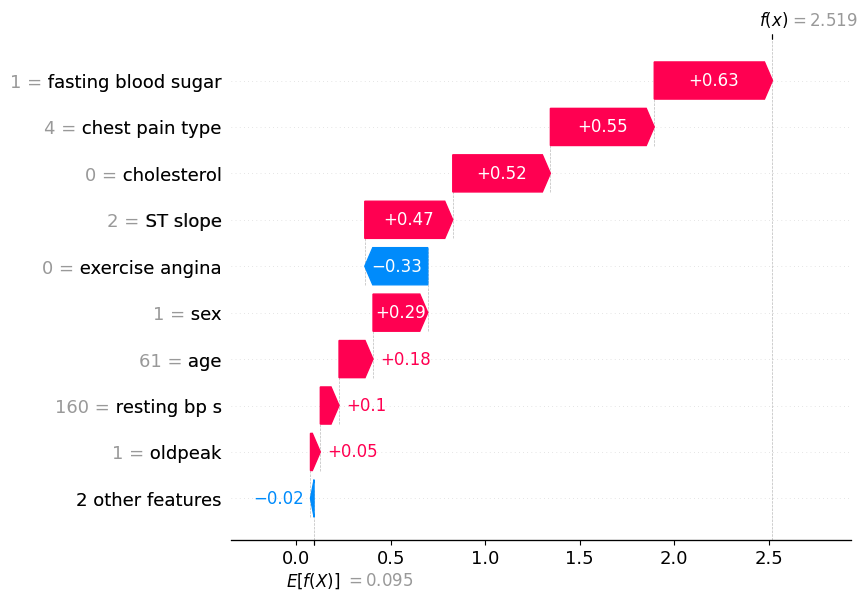

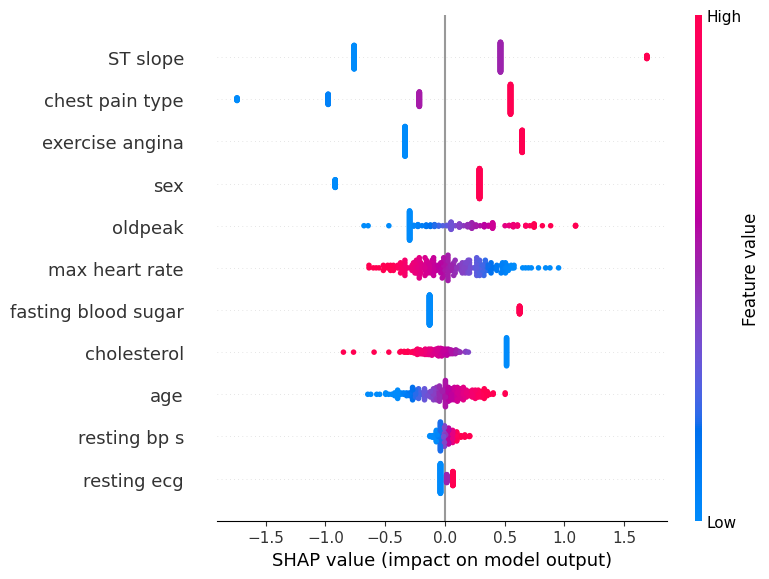

In [ ]:
#shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

shap.summary_plot(shap_values, X_test)


